In [9]:
# IMPORT LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# LOAD DATASET

path = r"C:\\Users\\91910\\Desktop\\learning_python\\ML\\Datasets\\score_updated.csv"
df = pd.read_csv(path)
df

,study_hours,study_marks
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
...,...,...
91,5.8,60
92,4.4,44
93,6.1,63
94,3.7,37


In [11]:
df.head()

,study_hours,study_marks
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [12]:
df.tail()

,study_hours,study_marks
91,5.8,60
92,4.4,44
93,6.1,63
94,3.7,37
95,8.0,84


In [13]:
df.shape

(96, 2)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   study_hours  96 non-null     float64
 1   study_marks  96 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


In [15]:
df.describe()

,study_hours,study_marks
count,96.000000,96.000000
mean,5.267708,54.020833
std,2.503030,25.017459
min,1.000000,12.000000
25%,3.075000,30.750000
50%,5.250000,54.500000
75%,7.325000,74.250000
max,9.800000,99.000000


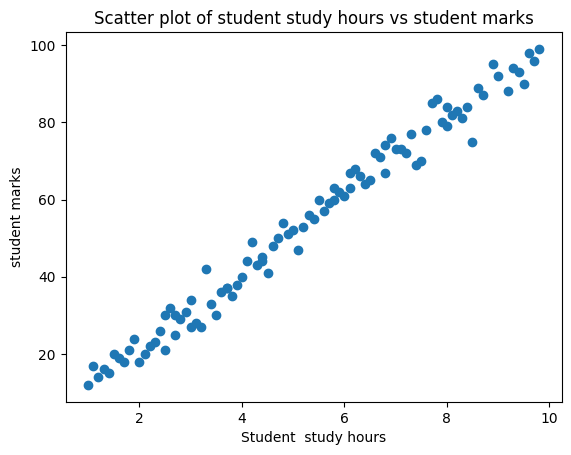

In [16]:
plt.scatter(x = df.study_hours , y = df.study_marks)
plt.xlabel("Student  study hours")
plt.ylabel('student marks')
plt.title("Scatter plot of student study hours vs student marks")
plt.show()

In [17]:
# PREPARE THE DATA FOR MACHINE LEARNING ALGORITHMS

# DATA CLEANING

df.isna()

,study_hours,study_marks
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
91,False,False
92,False,False
93,False,False
94,False,False


In [18]:
df.isna().sum()

study_hours    0
study_marks    0
dtype: int64

In [19]:
df.mean()

study_hours     5.267708
study_marks    54.020833
dtype: float64

In [20]:
df2 = df.fillna(df.mean())
df2

,study_hours,study_marks
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
...,...,...
91,5.8,60
92,4.4,44
93,6.1,63
94,3.7,37


In [21]:
df2.isna().sum()

study_hours    0
study_marks    0
dtype: int64

In [22]:
# SPLIT DATASET

X = df2.drop("study_marks", axis="columns")
y = df2.drop("study_hours", axis="columns")

print("shape of X = ", X.shape)
print("shape of y = ", y.shape)

shape of X =  (96, 1)
shape of y =  (96, 1)


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=51)
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (76, 1)
shape of y_train =  (76, 1)
shape of X_test =  (20, 1)
shape of y_test =  (20, 1)


In [24]:
# SELECT A MODEL AND TRAIN IT
# y = m * x + c

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [25]:
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
lr.coef_     # m = slope 

array([[9.83154007]])

In [27]:
lr.intercept_

array([2.72291189])

In [45]:
m = 9.83
c = 2.72
y = m * 9.5 + c
y

96.105

In [29]:
lr.predict([[4]])[0][0].round(2)

c:\Users\91910\miniconda3\envs\ML\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


42.05

In [30]:
y_pred = lr.predict(X_test)
y_pred

array([[88.25731048],
       [81.37523244],
       [44.99853418],
       [51.88061223],
       [39.09961014],
       [97.10569655],
       [75.4763084 ],
       [98.08885055],
       [34.18384011],
       [60.72899829],
       [58.76269028],
       [37.13330213],
       [27.30176206],
       [99.07200456],
       [22.38599203],
       [66.62792233],
       [53.84692025],
       [46.9648422 ],
       [65.64476833],
       [87.27415648]])

In [31]:
pd.DataFrame(np.c_[X_test ,y_test, y_pred], columns = ["study_hours", "study_marks_original", "Student_mark_predictor"])

,study_hours,study_marks_original,Student_mark_predictor
0,8.7,87.0,88.257310
1,8.0,79.0,81.375232
2,4.3,43.0,44.998534
3,5.0,52.0,51.880612
4,3.7,37.0,39.099610
5,9.6,98.0,97.105697
6,7.4,69.0,75.476308
7,9.7,96.0,98.088851
8,3.2,27.0,34.183840
9,5.9,62.0,60.728998


In [32]:
# FINE-TUNE YOUR MODEL

lr.score(X_test, y_test)

0.9789972675712987

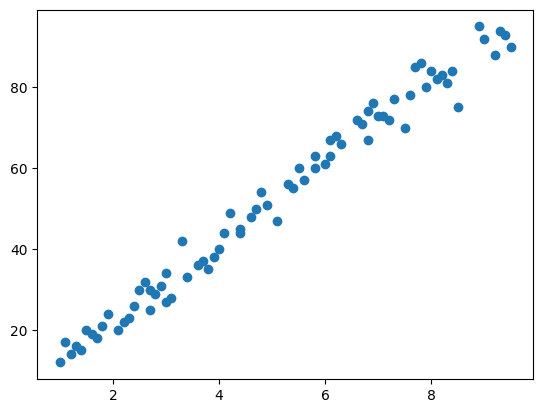

In [33]:
plt.scatter(X_train, y_train)

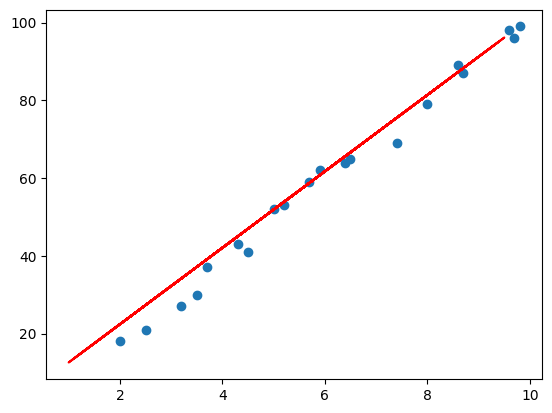

In [34]:
plt.scatter(X_test,y_test)
plt.plot(X_train, lr.predict(X_train), color = "red")


In [35]:
# PRESENT YOUR SOLUTION

# SAVE ML MODEL

import joblib as jb
jb.dump(lr, "Student_mark_predictor_Model.pkl")

['Student_mark_predictor_Model.pkl']

In [36]:
model = jb.load("Student_mark_predictor_Model.pkl")
model.predict([[5]])[0][0]

c:\Users\91910\miniconda3\envs\ML\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


51.880612231911684

In [37]:
# LAUNCH, MONITOR, AND, MAINTAIN, YOUR SYSTEM

lr.score(X_test, y_test)

0.9789972675712987

In [38]:
from sklearn.linear_model import Ridge , Lasso


In [39]:
rd = Ridge()

rd.fit(X_train,y_train)

rd.score(X_test,y_test)

0.9788868566666713

In [40]:
ls = Lasso()

ls.fit(X_train,y_train)

ls.score(X_test,y_test)

0.9779008550139573